In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read the dataset
data = pd.read_excel('algerian_forest_fire.xlsx')
print(data.head(),'\n \n data shape:',data.shape)

   day  month  year  Temperature   RH   Ws  ...  DMC    DC  ISI  BUI  FWI  y
0    1      6  2012           29   57   18  ...  3.4   7.6  1.3  3.4  0.5  0
1    2      6  2012           29   61   13  ...  4.1   7.6  1.0  3.9  0.4  0
2    3      6  2012           26   82   22  ...  2.5   7.1  0.3  2.7  0.1  0
3    4      6  2012           25   89   13  ...  1.3   6.9  0.0  1.7  0.0  0
4    5      6  2012           27   77   16  ...  3.0  14.2  1.2  3.9  0.5  0

[5 rows x 14 columns] 
 
 data shape: (122, 14)


data processing

In [4]:
duplicate = data[data.duplicated()]
print("Dublicate Roes :",duplicate)

Dublicate Roes : Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, y]
Index: []


In [5]:
data.isnull().sum().sum()

0

In [6]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,y
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,15.754098,7.500000,2012.0,31.180328,67.975410,16.000000,0.842623,74.672951,12.314754,53.160656,3.655738,15.426230,5.577869,0.483607
std,8.843274,1.115259,0.0,3.320401,11.154411,2.848807,2.409208,15.558713,11.274360,51.778265,3.021768,14.474302,6.343051,0.501792
min,1.000000,6.000000,2012.0,22.000000,45.000000,11.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,29.000000,60.000000,14.000000,0.000000,65.925000,3.725000,10.050000,1.125000,5.100000,0.500000,0.000000
50%,16.000000,7.500000,2012.0,31.000000,68.000000,16.000000,0.000000,80.900000,9.450000,35.550000,2.650000,11.200000,3.000000,0.000000
75%,23.000000,8.000000,2012.0,34.000000,77.750000,18.000000,0.500000,86.775000,16.300000,79.025000,5.600000,21.675000,8.700000,1.000000
max,31.000000,9.000000,2012.0,37.000000,89.000000,26.000000,16.800000,90.300000,54.200000,220.400000,12.500000,67.400000,30.200000,1.000000


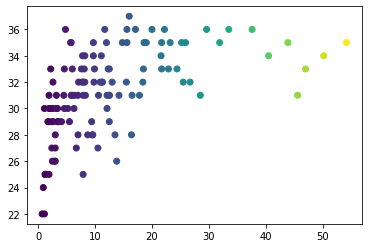

In [7]:
# create scatter plot
plt.scatter(data['DMC'], data['Temperature'], c=data['DMC'], cmap='viridis')


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
F1 = scaler.fit_transform(data[['Temperature']]) 
D1 = scaler.fit_transform(data[['DMC']])

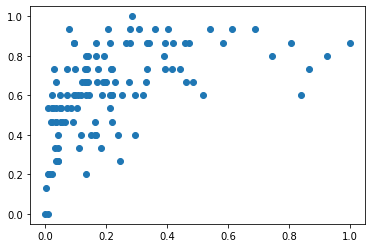

In [9]:
plt.scatter(D1, F1, cmap='viridis')

In [10]:
# import KMeans
from sklearn.cluster import KMeans
# create kmeans object
kmeans = KMeans(n_clusters=4)
points = data[['DMC','Temperature']]
# fit kmeans object to data
kmeans.fit(points)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(points)

[[ 3.28181818 28.36363636]
 [45.57142857 34.        ]
 [23.35909091 34.04545455]
 [10.71632653 32.02040816]]


In [12]:
data['cluster'] = y_km
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,y,cluster
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,2
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,2
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,2
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,2
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0,2
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,1,0
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,0,0
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,0,2


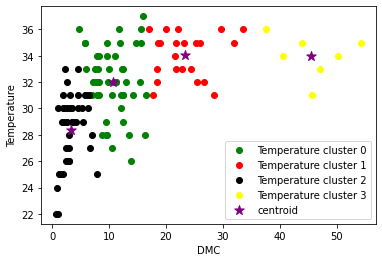

In [13]:
# We have our 4 clusters, as it nearly perfectly captured the boundaries of the initial clusters we created.
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
df4 = data[data.cluster==3]
plt.scatter(df1.DMC,df1['Temperature'],color='green')
plt.scatter(df2.DMC,df2['Temperature'],color='red')
plt.scatter(df3.DMC,df3['Temperature'],color='black')
plt.scatter(df4.DMC,df4['Temperature'],color='yellow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid',s = 100)
plt.xlabel('DMC')
plt.ylabel('Temperature')
plt.legend(['Temperature cluster 0','Temperature cluster 1','Temperature cluster 2','Temperature cluster 3','centroid'],loc=0)

**Elbow**

used to pick up the best k

In [14]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[['DMC','Temperature']])
    sse.append(kmeans.inertia_)



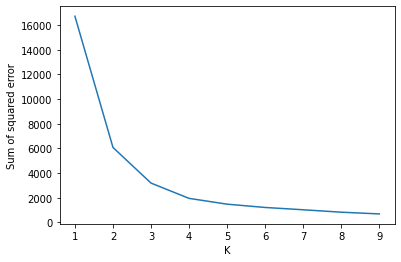

In [15]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)